# Explore Data

**Source:** FBI National Stolen Art File\
**Retrieval Date:** August 25, 2024\
**About:** A listing of the paintings, statuary, and other forms of fine art in the FBI's database of stolen artwork and culturally-significant property.].\
**Source URL:** [Access web database here.](https://artcrimes.fbi.gov/nsaf-view?searchText=&crimeCategory=)\
**Github Source:** The data taken from the FBI National Stolen Art File will be saved in several formats in this repo, and different formatted versions will be used for this project dependent on the transformation and type of test being applied.

In [296]:
import numpy as np
import pandas as pd

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
from matplotlib import rcParams

In [299]:
df = pd.read_csv('/Users/Alli_1/Documents/Repos/fbi_stolen_art_research/Data/nsaf_books-watercolor-painting_sample.csv',na_values=['NA'])

Briefly making sure the data loaded correctly and looks as expected...

In [300]:
df.head()

,Title,Category,Unique-Multiple,Image,Ref_Num,Maker_Artist,Artist_2,Artist_Culture,Artist_2_Culture,Manufacture_Country,...,Largest_Dim_CM,Weight,Time Period,TP_Start,TP_End,Manufacture_Start,Manufacture_End,Color-Primary,Additional Information,Removed_Database
0,"A New General Atlas, Constructed From the Late...",Books and Ephemera,Multiple,N,895,Aaron Arrowsmith,A. Constable and Longman (Publishers),English,English,United Kingdom,...,30.0,NaN,Copyright 1817,1817,1817,1817,1818,NaN,"Edinburgh, London; A. Constable; Longman; [2] ...",N
1,Capita deorvm et illvstrivm hominvm pacis bell...,Books and Ephemera,Multiple,N,895,Johann Martin von Ebermayer,NaN,German,NaN,Germany,...,39.0,NaN,Copyright: 1721,1721,1721,1721,1725,NaN,"Francofvrti et Lipsioe; 4 p.1., 226, [22] p. i...",N
2,Consilia Medica,Books and Ephemera,Multiple,N,925,Bartholomaeus Montagnana,Jacobus de Vitalibus,Italian,Italian,Italy,...,38.0,NaN,1476,1476,1476,1476,1476,NaN,Likely published in Padua given 1476 ed,Y
3,Des imagistes: an anthology,Books and Ephemera,Multiple,N,895,Ezra Pound,A and C Boni,American,American,United States of America,...,45.0,NaN,Copyright 1983,1914,1914,1914,1914,Black and white,"New York, A and C Boni; 63 p.",N
4,Elegy on Dead Fashion,Books and Ephemera,Multiple,N,895,Edith Sitwell,Duckworth,English,English,United Kingdom,...,25.0,NaN,Copyright: 1926,1926,1926,1926,1927,NaN,"London, Duckworth; 2, 21, [1] p. front., illus...",N


Converting dates into datetime data

In [301]:
df['TP_Start'] = pd.to_datetime(df['TP_Start'])
df['TP_End'] = pd.to_datetime(df['TP_End'])

In [302]:
df['Manufacture_Start'] = pd.to_datetime(df['Manufacture_Start'])
df['Manufacture_End'] = pd.to_datetime(df['Manufacture_End'])

With data loaded and formatted correctly, also creating version of individual categories for ease of use later in analysis...

In [303]:
#30 books in sample
books = df[df['Category'] == 'Books and Ephemera']

In [304]:
#31 drawings and watercolors in sample
dwcs = df[df['Category'] == 'Drawings and Watercolors']

In [305]:
#169 paintings in sample
paintings = df[df['Category'] == 'Paintings']

## Metrics & Visualizations

### Object Sizes

The median object size from my sample is 24 inches (60.96 cm) with a standard deviation of 17.37 inches. Since my research only included three categories, we shouldn't seek to take too much away from the grouped metrics, and should instead look at the metrics for each category.

In [306]:
df['Largest_Dim_CM'].describe()

count    230.000000
mean      68.234304
std       44.123791
min        9.000000
25%       35.560000
50%       60.960000
75%       86.360000
max      274.320000
Name: Largest_Dim_CM, dtype: float64

The size distribution for objects in the **books and ephemera** category is right skewed. The mean and median sizes for those objects are 10.3 & 9.25 inches respectively, with the largest object being 17.7 inches.

In [307]:
books['Largest_Dim_CM'].describe()

count    30.000000
mean     26.240000
std       8.124488
min       9.000000
25%      20.875000
50%      23.500000
75%      30.750000
max      45.000000
Name: Largest_Dim_CM, dtype: float64

The size distribution for objects in the **drawings and watercolors** category is more normally distributed. The mean and median sizes for those objects are 18.4 & 18.7 inches respectively. The largest work in that category's sample is 30 inches.

In [308]:
dwcs['Largest_Dim_CM'].describe()

count    31.000000
mean     46.747097
std      14.565704
min      23.190000
25%      33.655000
50%      47.500000
75%      55.245000
max      76.200000
Name: Largest_Dim_CM, dtype: float64

The size distribution for objects in the **paintings** category is right skewed. The mean and median sizes for those objects are 31.4 and 28.5 respectively. The largest work in the paintings category sample is an outlier at 108 inches.

In [309]:
paintings['Largest_Dim_CM'].describe()

count    169.000000
mean      79.630355
std       45.538887
min       10.160000
25%       50.800000
50%       72.390000
75%      101.600000
max      274.320000
Name: Largest_Dim_CM, dtype: float64

The following visual shows the three categories as one sample.

In [310]:
rcParams['figure.figsize'] = 10,3

Text(0.5, 1.0, 'object size distribution in cm')

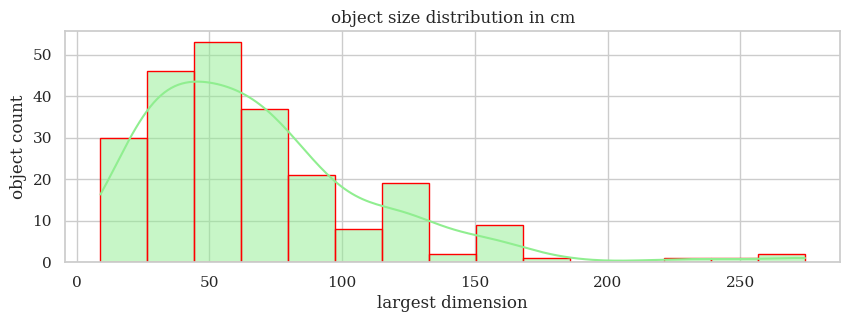

In [311]:
sns.histplot(df['Largest_Dim_CM'], bins=15, kde=True, color='lightgreen', edgecolor='red')

plt.xlabel('largest dimension')
plt.ylabel('object count')
plt.title('object size distribution in cm')

Text(0.5, 1.0, 'object size distribution in cm')

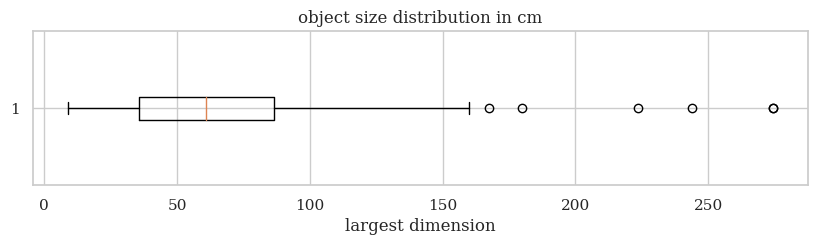

In [312]:
rcParams['figure.figsize'] = 10,2
plt.boxplot(df['Largest_Dim_CM'], vert=False)
plt.xlabel('largest dimension')
plt.title('object size distribution in cm')

The difference between the grouped boxplot and the boxplots for the different categories really shows how the outliers are more specific to the paintings category.

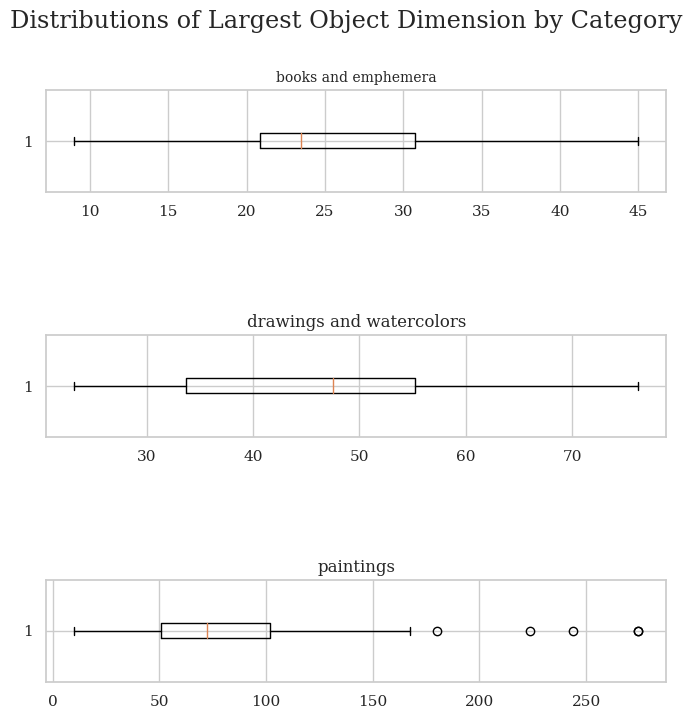

In [313]:
fig = plt.figure(figsize=(8, 8)) # Optional: set the overall figure size
st = fig.suptitle("Distributions of Largest Object Dimension by Category", fontsize="x-large")


# First subplot (3 rows, 1 column, index 1)
ax1 = plt.subplot(5, 1, 1)
ax1.boxplot(books['Largest_Dim_CM'], vert=False)
ax1.set_title('books and emphemera', fontsize=10)

# Second subplot (3 rows, 1 column, index 2)
ax2 = plt.subplot(5, 1, 3)
ax2.boxplot(dwcs['Largest_Dim_CM'], vert=False)
ax2.set_title('drawings and watercolors')

# Third subplot (3 rows, 1 column, index 3)
ax3 = plt.subplot(5, 1, 5)
ax3.boxplot(paintings['Largest_Dim_CM'], vert=False)
ax3.set_title('paintings')

# shift subplots down:
st.set_y(0.95)
fig.subplots_adjust(top=0.85)

One thing worth considering with the different difference ranges in these three categories, and the significant number of outliers in the paintings categories, is the which materials can be made more compact without being destroyed. Paintings on canvas can be removed from their stretches or cut out of their frames, become more portable, and maintain their market value. 

When we cut the size metrics by looking at canvas vs. wood backed paintings, we can see that canvas may be driving the range of sizes in the category.

In [314]:
canvas_size = paintings[paintings['Material_Primary-Base'] == 'canvas']['Largest_Dim_CM'].median()
panel_size = paintings[paintings['Material_Primary-Base'] == 'wood']['Largest_Dim_CM'].median()
paintings_size = paintings['Largest_Dim_CM'].median()

print(f"Median Largest Dimensions\nAcross Painting Sample: {paintings_size}\nCanvases Only: {canvas_size}\nPanels only: {panel_size}")

Median Largest Dimensions
Across Painting Sample: 72.39
Canvases Only: 73.97999999999999
Panels only: 60.980000000000004


Next, we can see how they look broken out by category, still in one chart. This helps illustrate that, while the object distributions do vary by category, all veer towards smaller sizes, with a significant drop in object counts after 100 cm, or 37.4 inches.

Text(0.5, 1.0, 'object size distribution in cm')

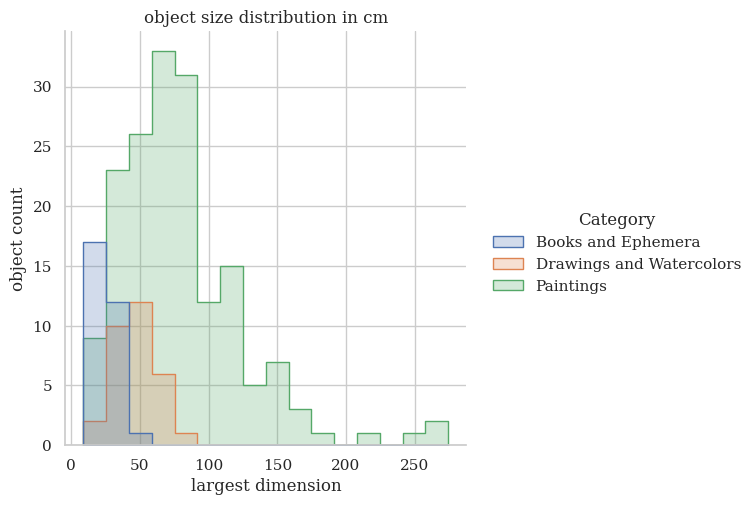

In [315]:
rcParams['figure.figsize'] = 10,3
sns.displot(df, x="Largest_Dim_CM", hue="Category", element="step")
plt.xlabel('largest dimension')
plt.ylabel('object count')
plt.title('object size distribution in cm')

Text(0.5, 1.0, 'object size distribution in cm')

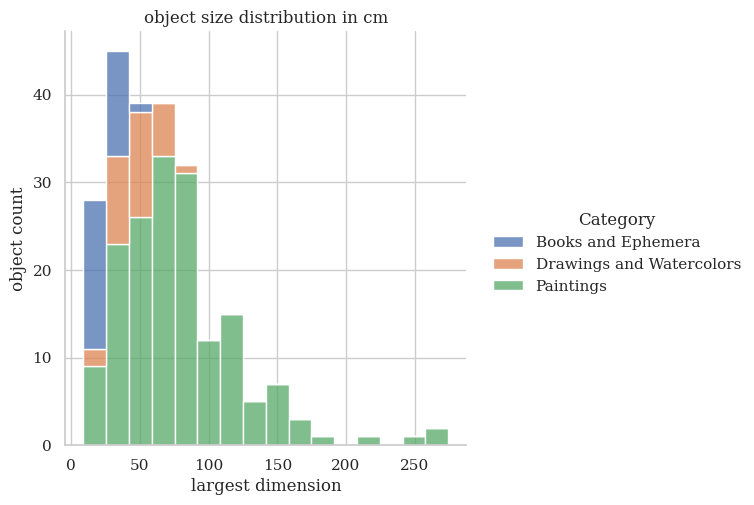

In [316]:
rcParams['figure.figsize'] = 10,3
sns.displot(df, x="Largest_Dim_CM", hue="Category",multiple="stack")
plt.xlabel('largest dimension')
plt.ylabel('object count')
plt.title('object size distribution in cm')

And by distribution density.

Text(0.5, 1.0, 'object size distribution in cm')

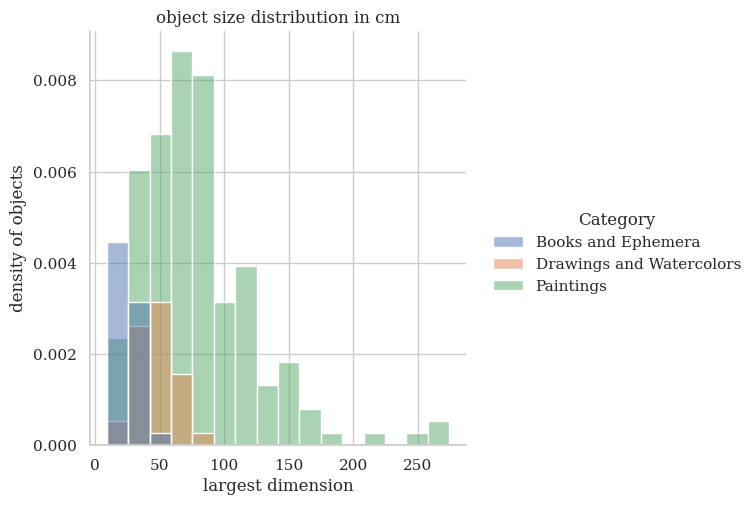

In [317]:
rcParams['figure.figsize'] = 10,3
sns.displot(df, x="Largest_Dim_CM", hue="Category", stat="density")
plt.xlabel('largest dimension')
plt.ylabel('density of objects')
plt.title('object size distribution in cm')

### Artist Culture

The most frequently represented culture among the artists/makers in these three categories was American, at 37.8% of the sample with 87 objects. This makes sense given that this is an American database.

American was followed by French, Italian, English, and Lithuanian. It is expected that we see a high number of French artists given the migration of artists and artworks between France and the US between and directly after the two world wars. Italian artists were highly represented among collectors of Old Masters artworks, as well as among Catholic collectors. It is also reasonable that we see quite a few works by English artists given the relationship between our two countries and the importance of British publishing houses for consumers of English-language books and ephemera. 

The high frequency of objects made by Lithuanian artists is due to a 30-year old crime skewing the data. The Lithuanian artist Arbit Blatas' storage unit, containing over 200 paintings, was robbed sometime in 1994. 13 of those lost works ended up in my sample.

In [318]:
df['Artist_Culture'].value_counts(normalize=True)

Artist_Culture
American      0.378261
French        0.078261
Italian       0.065217
English       0.060870
Lithuanian    0.056522
Chinese       0.047826
Russian       0.043478
Unknown       0.043478
Dutch         0.026087
Mexican       0.026087
Peruvian      0.017391
Flemish       0.017391
German        0.017391
Armenian      0.013043
Danish        0.013043
Cuban         0.013043
Japanese      0.013043
Ukrainian     0.008696
Spanish       0.008696
Argentan      0.008696
Persian       0.008696
Iranian       0.008696
Bulgarian     0.004348
Manx          0.004348
Egyptian      0.004348
Slavic        0.004348
Belgian       0.004348
Romanian      0.004348
Name: proportion, dtype: float64

In [319]:
df['Artist_Culture'].value_counts()

Artist_Culture
American      87
French        18
Italian       15
English       14
Lithuanian    13
Chinese       11
Russian       10
Unknown       10
Dutch          6
Mexican        6
Peruvian       4
Flemish        4
German         4
Armenian       3
Danish         3
Cuban          3
Japanese       3
Ukrainian      2
Spanish        2
Argentan       2
Persian        2
Iranian        2
Bulgarian      1
Manx           1
Egyptian       1
Slavic         1
Belgian        1
Romanian       1
Name: count, dtype: int64

Most of the objects in this sample did not have two artists/makers associated with them.\
\
However, those that do are primarily in the books and ephemera category, which is why we see secondary cultures most frequently associated with cultures important to early and modern publishing.\
\
If I am able to move into preparing the sample of the objects in the prints category in the future, I would also expect to see more objects with a secondary artist/maker in the form of the printing house or lead printer.

In [320]:
df_ac_counts = df.groupby('Artist_Culture').count().reset_index()
df_ac_counts = df_ac_counts[['Artist_Culture','Title']].rename(columns={"Artist_Culture": "culture", "Title": "count"})
df_ac_counts['type'] = 'primary'

In [321]:
df_a2c_counts = df.groupby('Artist_2_Culture').count().reset_index()
df_a2c_counts = df_a2c_counts[['Artist_2_Culture','Title']].rename(columns={"Artist_2_Culture": "culture", "Title": "count"})
df_a2c_counts['type'] = 'secondary'

In [322]:
df_ac_tcombo = pd.concat([df_a2c_counts, df_ac_counts]).sort_values("count", ascending=False).set_index("culture")
df_ac_tcombo.head()

,count,type
culture,,
American,87,primary
French,18,primary
Italian,15,primary
English,14,primary
Lithuanian,13,primary


In [323]:
import seaborn.objects as so
from matplotlib import style

In [324]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Garamond', 'Times New Roman']

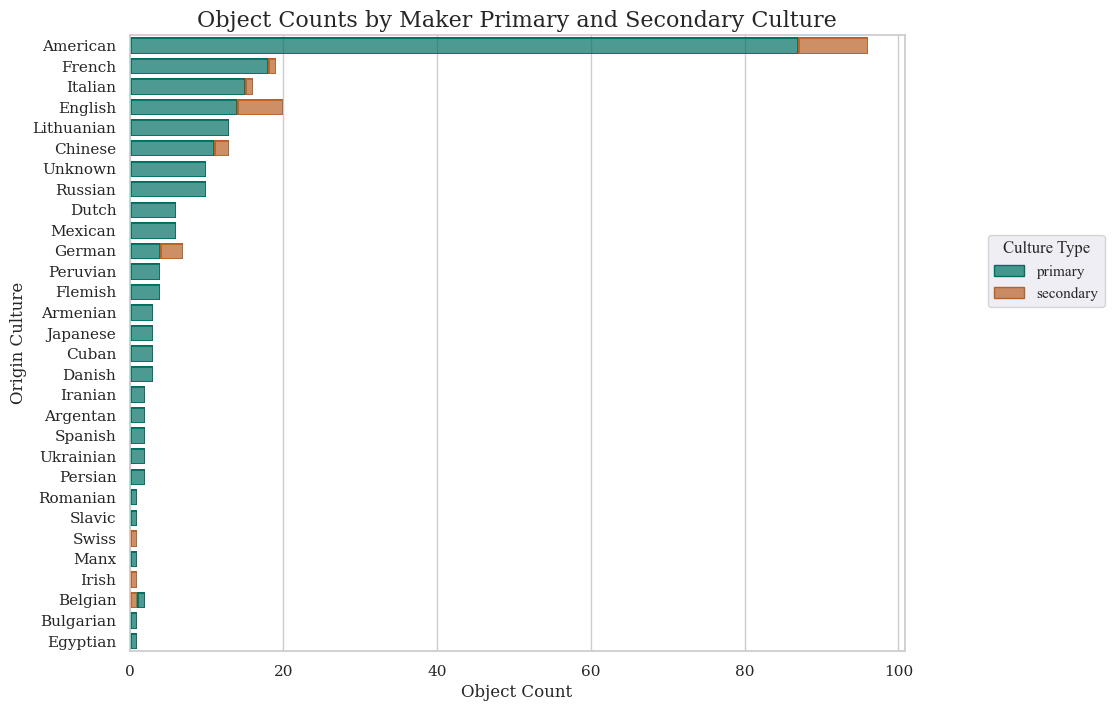

In [325]:
custom_colors = ["#006F62", "#B86125"]

# 1. Create a Matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

#sns.set_style("whitegrid", rc={"axes.facecolor": "white", "figure.facecolor": "white"})

# 2. Create a Seaborn object plot and use .on() to attach it to the axes
plot = (
    so.Plot(df_ac_tcombo, y="culture", x="count",color="type")
    .add(so.Bar(), so.Stack())).label(x="Object Count", y="Origin Culture", color="Culture Type").scale(color=custom_colors).on(ax)

# 3. Compile and render the plot
plot.plot() # Use .plot() to compile without immediately showing the figure

# 5. Further customization can be done on the original 'ax' object
ax.set_title("Object Counts by Maker Primary and Secondary Culture", fontsize=16)

# 6. Display the plot
plt.show()

### Predominante Color

One metric I was curious about was how aesthetic desirability impacted theft. There is not a universal scale for aesthetic desirability that I could apply to the NSAF objects. However, studies have found that blue and red paintings sell for more than other colors at auction. Anecodately, gallerists and publishers will tell you that blue works are particularly strong. 

With this in mind, I also coded the objects in the samples with the predominate color in cases where images were available or the information was known from other sources.

Works without images were coded as "Unknown" for their predominate color. Works that did not jump out as having a predominate color to through a human eye check were coded as "Multi."

I found that just as blue and red are key colors for auction sales, blue and red were the most popular colors after counting the "Multi" and "Unknown" objects. **Red and blue were particularly common for paintings.** 

In [326]:
df_colors = df.groupby('Color-Primary').count().reset_index()
df_colors = df_colors[['Color-Primary','Title']].rename(columns={"Color-Primary": "color", "Title": "count"})
df_colors = df_colors.sort_values('count', ascending=False)
df_colors.head()

,color,count
7,Multi,57
11,Unknown,40
2,Blue,32
1,Black and white,23
10,Red,14


First here is a clear view of the predominate colors across all three object categories.

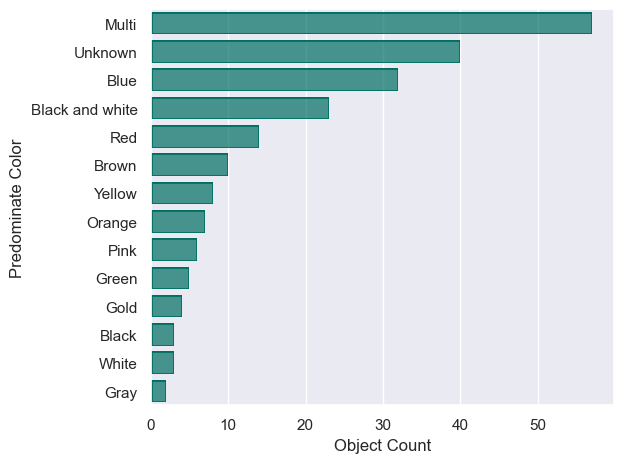

In [328]:
plot = (
    so.Plot(df_colors, y="color", x="count")
    .add(so.Bar(color='#006F62'))).label(x="Object Count", y="Predominate Color")

plot.show()

Next, with a cross tabulation...

In [329]:
color_crosstab = pd.crosstab(df['Color-Primary'], df['Category'])
print(color_crosstab)

Category         Books and Ephemera  Drawings and Watercolors  Paintings
Color-Primary                                                           
Black                             0                         0          3
Black and white                  10                        11          2
Blue                              0                         3         29
Brown                             1                         3          6
Gold                              0                         0          4
Gray                              0                         1          1
Green                             0                         1          4
Multi                             1                         4         52
Orange                            0                         0          7
Pink                              0                         1          5
Red                               0                         2         12
Unknown                           2                

In [330]:
color_crosstab = color_crosstab.stack().reset_index(name='count').sort_values("count", ascending=False)
color_crosstab.head()

,Color-Primary,Category,count
23,Multi,Paintings,52
35,Unknown,Paintings,35
8,Blue,Paintings,29
32,Red,Paintings,12
4,Black and white,Drawings and Watercolors,11


This next chart shows the predominante color by category.

Aside from "multi," black and white was predominate among books and emphera.

Blue and red were the second and third most popular colors for paintings.

In [333]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Garamond', 'Times New Roman']

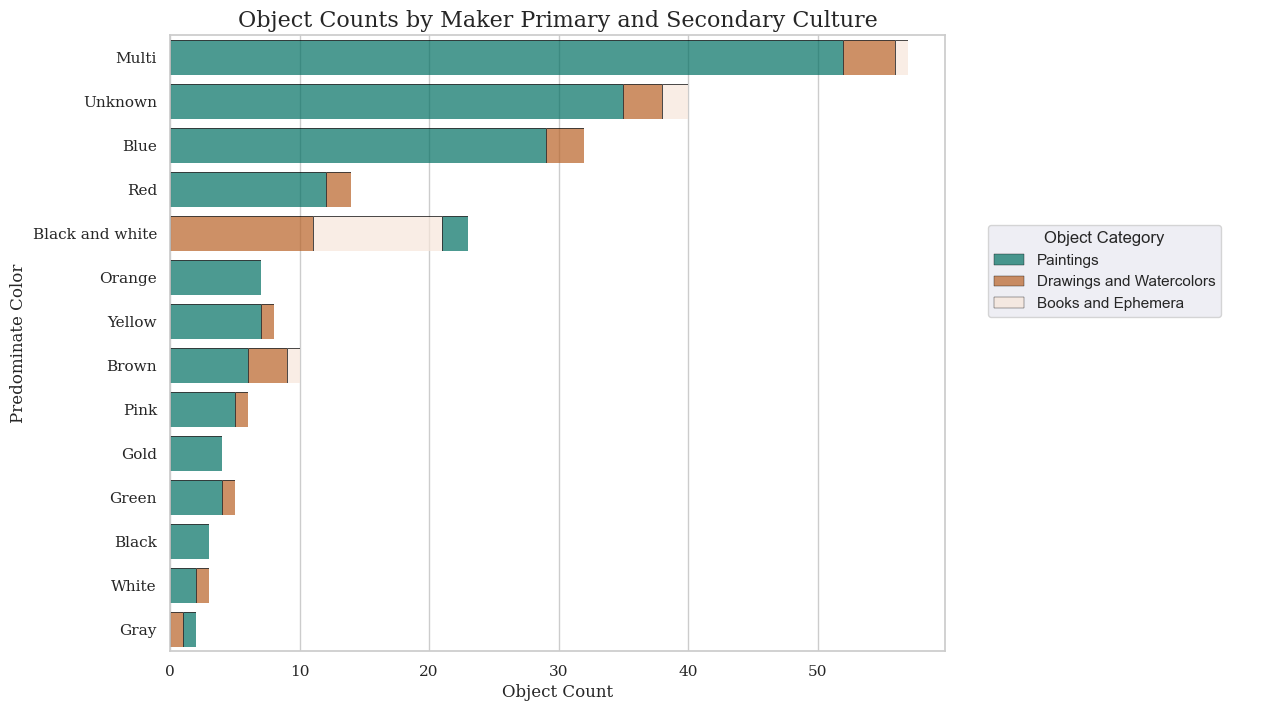

In [334]:
custom_colors = ["#006F62", "#B86125", "#F7E6DA"] #, "#74E3C9"]

# 1. Create a Matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

sns.set_style("whitegrid")

# 2. Create a Seaborn object plot and use .on() to attach it to the axes
plot = (
    so.Plot(color_crosstab, y="Color-Primary", x="count",color="Category")
    .add(so.Bar(edgecolor="black", edgewidth=.25), so.Stack())).label(x="Object Count", y="Predominate Color", color="Object Category").scale(color=custom_colors).on(ax)

# 3. Compile and render the plot
plot.plot() # Use .plot() to compile without immediately showing the figure

# 5. Further customization can be done on the original 'ax' object
ax.set_title("Object Counts by Maker Primary and Secondary Culture", fontsize=16)

# 6. Display the plot
plt.show()